__Students:__ Andrea Ceriati, Kathryn Lesh, Emily Sims, Scott Zuckerbrow

__Instructor:__ Daniel Pulido-Mendez

__Course:__ Data Analytics Boot Camp

__Assignment:__ Project 4

__Date:__ 04/22/2024

## Table of Contents

1. [**Data Cleaning & Wrangling**](#DWrang)

    1.1 [**Checking and Correcting Data Format**](#Dform)
   
    1.2 [**Handling Missing Data**](#MissD)

2. [**Data preparation**](#DPrep)
   
   2.1 [**Feature Selection**](#FSel)

   2.2 [**Descriptive Statistics**](#DS)

   2.3 [**Data scaling**](#Scale)

4. [**Logistic Regression and KNN Models**](#Log-KNN)
   
    3.1 [**Function for Model Evaluation**](#ModelFunc)
   
    3.2 [**Logistic Regression Model**](#LogModEval)

    3.3 [**Knn Model**](#KNN)

5. [**Neural Network Model**](#NN) 

## Imports <a name="IL"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
import keras_tuner as kt

import warnings
warnings.filterwarnings("ignore")

## 1. Data Cleaning & Wrangling <a name="DWrang"></a>

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

#  Import and read the "Shark Tank US dataset.csv".
sharktank_df = pd.read_csv("Shark Tank US dataset.csv")
sharktank_df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,Female,Atlanta,GA,NaN,Tiffany Krumins,0.0,4.15,50000,15.0,333333,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN,NaN,50000.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,Mr.Tod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,Male,Somerset,NJ,NaN,Tod Wilson,0.0,4.15,460000,10.0,4600000,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,Male,Cary,NC,NaN,Kevin Flannery,0.0,4.15,1200000,10.0,12000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,Male,Tampa,FL,NaN,"Nick Friedman, Omar Soliman",0.0,4.15,250000,25.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Software/Tech,Ionic Ear - Novelties,NaN,Male,St. Paul,MN,NaN,Darrin Johnson,0.0,4.15,1000000,15.0,6666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


In [3]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 53 columns.


### 1.1 Checking and correcting data format <a name="Dform"></a>

In [4]:
# Determine column datatypes
sharktank_df.dtypes

Season Number                           int64
Startup Name                           object
Episode Number                          int64
Pitch Number                            int64
Season Start                           object
Season End                             object
Original Air Date                      object
Industry                               object
Business Description                   object
Company Website                        object
Pitchers Gender                        object
Pitchers City                          object
Pitchers State                         object
Pitchers Average Age                   object
Entrepreneur Names                     object
Multiple Entrepreneurs                float64
US Viewership                         float64
Original Ask Amount                     int64
Original Offered Equity               float64
Valuation Requested                     int64
Got Deal                                int64
Total Deal Amount                 

In [5]:
# Convert "Season Start", "Season End", "Original Air Date" columns to datetime
# Specify the format of the dates
date_format = '%d-%b-%y'
sharktank_df['Season Start'] = pd.to_datetime(sharktank_df['Season Start'], format=date_format)
sharktank_df['Season End'] = pd.to_datetime(sharktank_df['Season End'], format=date_format)
sharktank_df['Original Air Date'] = pd.to_datetime(sharktank_df['Original Air Date'], format=date_format)

### 1.2 Handling Missing Data <a name="MissD"></a>

In [6]:
print("Number of null values in each column:")
sharktank_df.isnull().sum()

Number of null values in each column:


Season Number                            0
Startup Name                             0
Episode Number                           0
Pitch Number                             0
Season Start                             0
Season End                              71
Original Air Date                        0
Industry                                 0
Business Description                     0
Company Website                        758
Pitchers Gender                          7
Pitchers City                          819
Pitchers State                         556
Pitchers Average Age                   936
Entrepreneur Names                     495
Multiple Entrepreneurs                 427
US Viewership                            4
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      531
Total Deal Equity                      531
Deal Valuat

In [7]:
sharktank_df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Industry',
       'Business Description', 'Company Website', 'Pitchers Gender',
       'Pitchers City', 'Pitchers State', 'Pitchers Average Age',
       'Entrepreneur Names', 'Multiple Entrepreneurs', 'US Viewership',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of Sharks in Deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Advisory Shares Equity', 'Loan',
       'Deal Has Conditions', 'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymon

In [8]:
# The company website has 587 missing values. We assume this means no website. 
# Replace data with binary data (1 has a website / 0 it does not have a website)
sharktank_df['Has_Website'] = sharktank_df['Company Website'].isna().astype(int)
sharktank_df.drop('Company Website',axis=1, inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 53 columns.


In [9]:
# Check if we have the expected number of no-websites. 
int(sharktank_df.shape[0])-sharktank_df['Has_Website'].sum()

587

In [10]:
# Determine the rows with missing values in Pitchers' Gender
# New dataframe
dfN1=sharktank_df[['Pitchers Gender']].copy()
# checks which rows in the new dataframe contain missing values
dfN1[dfN1.isnull().any(axis=1)] 

,Pitchers Gender
994,NaN
998,NaN
1000,NaN
1004,NaN
1070,NaN
1099,NaN
1121,NaN


In [11]:
# Determine the missing value gathering information from other columns such as Startup Name and Entrepreneur Names
sharktank_df.iloc[[994, 998, 1000, 1004, 1070, 1099, 1121]][["Entrepreneur Names","Startup Name"]]

,Entrepreneur Names,Startup Name
994,Wylie Robinson,Rumpl
998,Juan Salinas,PNuffCrunch
1000,Sobhan Kanaee and Kanz Kayfan,AnimatedLure
1004,Jordan Long and Liz Charm,SurpriseCake
1070,Harry Levin and Michael Sweigar,FurZapper
1099,Dwayne Walker and Tim Samuel,Sparketh
1121,Tommy Holl,TheRealElf


In [12]:
# Replace missing values in gender column after having conducted a brief research on the pitchers gender
sharktank_df.loc[994, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[998, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1000, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1004, 'Pitchers Gender'] = 'Mixed Team'
sharktank_df.loc[1070, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1099, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1121, 'Pitchers Gender'] = 'Male'

Delete columns that have many missing values and seem unlikely to be relevant. 

In [13]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age. Also drop Season End date as redundant. 
sharktank_df.drop(columns=['Season End', 'Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names'], inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 48 columns.


In [14]:
# Multiple Entrepreneurs column has a lot of missing values
# Replace values in column 'Multiple Entrepreneurs' where the corresponding value in column 'Pitchers Gender' is 'Mixed Team'.
sharktank_df.loc[sharktank_df['Pitchers Gender'] == 'Mixed Team', 'Multiple Entrepreneurs'] = 1

NOTE: 354 values still missing in 'Multiple Entrepreneurs' column. Drop it.

In [15]:
# Drop Multiple Entrepreneurs due to more than one-quarter of the values being missing for each column
sharktank_df.drop(columns=['Multiple Entrepreneurs'], inplace=True)

In [16]:
# Determine the rows with missing values in "US Viewership"
dfN2=sharktank_df[['US Viewership']].copy() # defines a new dataframe
dfN2[dfN2.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

,US Viewership
1341,NaN
1342,NaN
1343,NaN
1344,NaN


In [17]:
# Viewership has missing values for last four episodes, check what was the viewership for the episodes before the last four.
sharktank_df.tail(6)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Original Air Date,Industry,Business Description,Pitchers Gender,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Has_Website
1339,15,ChefeeRobotics,17,1339,2023-09-29,2024-03-08,Electronics,Robotic chef,Male,3.13,500000,4.0,12500000,1,500000.0,15.0,3333333.0,1.0,500000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,15.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1340,15,LadyAlpha,17,1340,2023-09-29,2024-03-08,Lifestyle/Home,Nursing cover,Mixed Team,3.13,100000,10.0,1000000,1,100000.0,10.0,1000000.0,1.0,100000.0,10.0,NaN,NaN,NaN,NaN,100000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1341,15,NowhereBakery,18,1341,2023-09-29,2024-03-15,Food and Beverage,Healthy bakery,Mixed Team,NaN,200000,10.0,2000000,1,100000.0,12.5,800000.0,1.0,100000.0,12.5,NaN,NaN,100000.0,NaN,100000.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1342,15,TheMurderMysteryCo,18,1342,2023-09-29,2024-03-15,Uncertain/Other,Murder mystery parties,Male,NaN,350000,5.0,7000000,1,350000.0,10.0,3500000.0,1.0,350000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,10.0,Jason Blum,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1343,15,Overplay,18,1343,2023-09-29,2024-03-15,Software/Tech,App for video game creation,Mixed Team,NaN,500000,2.5,20000000,1,500000.0,4.0,12500000.0,1.0,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1344,15,Nourish+Bloom,18,1344,2023-09-29,2024-03-15,Lifestyle/Home,Autonomous grocery store,Mixed Team,NaN,400000,5.0,8000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0


In [18]:
# Assume that the viewership will remain constant for the last four episodes, replace missing value with 3.13
sharktank_df['US Viewership'].replace(np.nan, 3.13, inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 47 columns.


In [19]:
# Replace the missing values for the columns below with 0
sharktank_df[['Total Deal Amount', 
              'Total Deal Equity', 
              'Deal Valuation', 
              'Number of Sharks in Deal', 
              'Investment Amount Per Shark', 
              'Equity Per Shark', 
              'Royalty Deal', 
              'Loan']] = \
    sharktank_df[['Total Deal Amount', 
                  'Total Deal Equity', 
                  'Deal Valuation', 
                  'Number of Sharks in Deal', 
                  'Investment Amount Per Shark', 
                  'Equity Per Shark', 'Royalty Deal', 
                  'Loan']].fillna(0)

In [20]:
# Drop Loan column. Has just 55 non null values. 'Advisory Shares Equity' and 'Deal Has Conditions' have just 1 value each.
sharktank_df.drop(columns=['Advisory Shares Equity', 'Loan', 'Deal Has Conditions'], inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 44 columns.


In [21]:
def fill_present_columns(df, present_column, investment_column):
    # Replace missing values in 'present_column' with 1 where 'investment_column' is not missing
    df.loc[~df[investment_column].isna(), present_column] = 1

    # Identify rows where 'present_column' is 1
    guest_present_rows = df[df[present_column] == 1]

    # Replace missing values with 1 in the 'present_column' for the selected 'Season Number' and 'Episode Number'
    for index, row in guest_present_rows.iterrows():
        season_number = row['Season Number']
        episode_number = row['Episode Number']
        df.loc[(df['Season Number'] == season_number) & 
               (df['Episode Number'] == episode_number) &
               (df[present_column].isna()), present_column] = 1

In [22]:
# Call the function for Guests
fill_present_columns(sharktank_df, 'Guest Present', 'Guest Investment Amount')

In [23]:
# Assumption: if a guest did not make at least one deal in one episode he was not considered present in that episode
# Replace the missing values for the columns below with 0
sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']] = \
    sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']].fillna(0)

sharktank_df['Guest Name'].replace(np.nan, "NA", inplace=True)

In [24]:
# Assumption: for episodes in which we do not have data, if a investor did not make at least one deal 
# in the episode he was not considered present that episodes 
   
# Call the function defined above for Barbara Corcoran, Mark Cuban, Lori Greiner, Robert Herjavec, Daymond John, Kevin O Leary
fill_present_columns(sharktank_df, 'Barbara Corcoran Present', 'Barbara Corcoran Investment Amount')
fill_present_columns(sharktank_df, 'Mark Cuban Present', 'Mark Cuban Investment Amount')
fill_present_columns(sharktank_df, 'Lori Greiner Present', 'Lori Greiner Investment Amount')
fill_present_columns(sharktank_df, 'Robert Herjavec Present', 'Robert Herjavec Investment Amount')
fill_present_columns(sharktank_df, 'Daymond John Present', 'Daymond John Investment Amount')
fill_present_columns(sharktank_df, 'Kevin O Leary Present', 'Kevin O Leary Investment Amount')

In [25]:
# Replace the missing values for the columns below with 0
sharktank_df[['Barbara Corcoran Investment Amount', 
              'Barbara Corcoran Investment Equity', 
              'Mark Cuban Investment Amount', 
              'Mark Cuban Investment Equity', 
              'Lori Greiner Investment Amount',
              'Lori Greiner Investment Equity', 
              'Robert Herjavec Investment Amount', 
              'Robert Herjavec Investment Equity', 
              'Daymond John Investment Amount', 
              'Daymond John Investment Equity',
              'Kevin O Leary Investment Amount', 
              'Kevin O Leary Investment Equity', 
              'Barbara Corcoran Present', 
              'Mark Cuban Present', 
              'Lori Greiner Present', 
              'Robert Herjavec Present', 
              'Daymond John Present', 
              'Kevin O Leary Present']] = \
    sharktank_df[['Barbara Corcoran Investment Amount', 
                  'Barbara Corcoran Investment Equity', 
                  'Mark Cuban Investment Amount', 
                  'Mark Cuban Investment Equity', 
                  'Lori Greiner Investment Amount',
                  'Lori Greiner Investment Equity', 
                  'Robert Herjavec Investment Amount', 
                  'Robert Herjavec Investment Equity', 
                  'Daymond John Investment Amount', 
                  'Daymond John Investment Equity',
                  'Kevin O Leary Investment Amount', 
                  'Kevin O Leary Investment Equity', 
                  'Barbara Corcoran Present', 
                  'Mark Cuban Present', 
                  'Lori Greiner Present', 
                  'Robert Herjavec Present', 
                  'Daymond John Present', 
                  'Kevin O Leary Present']].fillna(0)

In [26]:
# Replace values in row 6 columns 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present' with 0 
# after confirming that Marc Cuban was not a shark in Shark Tank season 1 episode 2
sharktank_df.loc[6, ['Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present']] = 0

In [27]:
# Create new columns indicating whether each investor made a deal
sharktank_df['Barbara Corcoran Got Deal'] = (sharktank_df['Barbara Corcoran Investment Amount'] != 0).astype(int)
sharktank_df['Mark Cuban Got Deal'] = (sharktank_df['Mark Cuban Investment Amount'] != 0).astype(int)
sharktank_df['Lori Greiner Got Deal'] = (sharktank_df['Lori Greiner Investment Amount'] != 0).astype(int)
sharktank_df['Robert Herjavec Got Deal'] = (sharktank_df['Robert Herjavec Investment Amount'] != 0).astype(int)
sharktank_df['Daymond John Got Deal'] = (sharktank_df['Daymond John Investment Amount'] != 0).astype(int)
sharktank_df['Kevin O Leary Got Deal'] = (sharktank_df['Kevin O Leary Investment Amount'] != 0).astype(int)

In [28]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 50 columns.


In [29]:
# Check for remaining missing values
print('The number of missing values in the dataset is:',sharktank_df.isnull().sum().sum())

The number of missing values in the dataset is: 0


In [30]:
sharktank_df.to_csv('clean_data.csv', index=False)

## Data preparation and scaling <a name="DPrep"></a>

### 2.1. Feature selection <a name="FSel"></a>

In [31]:
# Convert categorical data to numeric with `pd.get_dummies`
sharktank_df = pd.get_dummies(sharktank_df, dtype='int')
sharktank_df.head()

Season Number  Episode Number  Pitch Number Season Start Original Air Date  \
0              1               1             1   2009-08-09        2009-08-09   
1              1               1             2   2009-08-09        2009-08-09   
2              1               1             3   2009-08-09        2009-08-09   
3              1               1             4   2009-08-09        2009-08-09   
4              1               1             5   2009-08-09        2009-08-09   

   US Viewership  Original Ask Amount  Original Offered Equity  \
0           4.15                50000                     15.0   
1           4.15               460000                     10.0   
2           4.15              1200000                     10.0   
3           4.15               250000                     25.0   
4           4.15              1000000                     15.0   

   Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
0               333333         1            50000.0               55.0   
1              4600000         1           460000.0               50.0   
2             12000000         0                0.0                0.0   
3              1000000         0                0.0                0.0   
4              6666667         0                0.0                0.0   

   Deal Valuation  Number of Sharks in Deal  Investment Amount Per Shark  \
0         90909.0                       1.0                      50000.0   
1        920000.0                       2.0                     230000.0   
2             0.0                       0.0                          0.0   
3             0.0                       0.0                          0.0   
4             0.0                       0.0                          0.0   

   Equity Per Shark  Royalty Deal  Barbara Corcoran Investment Amount  \
0              55.0           0.0                             50000.0   
1              25.0           0.0                            230000.0   
2               0.0           0.0                                 0.0   
3               0.0           0.0                                 0.0   
4               0.0           0.0                                 0.0   

   Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
0                                55.0                           0.0   
1                                25.0                           0.0   
2                                 0.0                           0.0   
3                                 0.0                           0.0   
4                                 0.0                           0.0   

   Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   Robert Herjavec Investment Equity  Daymond John Investment Amount  \
0                                0.0                             0.0   
1                                0.0                        230000.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   

   Daymond John Investment Equity  Kevin O Leary Investment Amount  \
0           

In [32]:
# Choose features to use for modeling 

financial = ['Original Ask Amount', 
             'Original Offered Equity',]

gender = ['Pitchers Gender_Female',
          'Pitchers Gender_Male', 
          'Pitchers Gender_Mixed Team']

industry = ['Industry_Automotive', 'Industry_Business Services',
       'Industry_Children/Education', 'Industry_Electronics',
       'Industry_Fashion/Beauty', 'Industry_Fitness/Sports/Outdoors',
       'Industry_Food and Beverage', 'Industry_Green/CleanTech',
       'Industry_Health/Wellness', 'Industry_Lifestyle/Home',
       'Industry_Liquor/Alcohol', 'Industry_Media/Entertainment',
       'Industry_Pet Products', 'Industry_Software/Tech', 'Industry_Travel',
       'Industry_Uncertain/Other',
        ]

#These features seem to cause overfitting
other =['Has_Website', 
        'US Viewership', 
       ]

#These features seem to cause overfitting
sharks_present = ['Barbara Corcoran Present', 
                  'Mark Cuban Present',
                  'Lori Greiner Present', 
                  'Robert Herjavec Present',
                  'Daymond John Present', 
                  'Kevin O Leary Present', 
                  'Guest Present',
                 ]

label=['Got Deal']

##########################################################
##########################################################
## Here is where we pick the features to use for our model
## The same features are used by default for all models
## in the file, though they can be adjusted at each stage
## if desired

selected_features = financial+gender+['Has_Website']

##########################################################
##########################################################

model_columns = label+selected_features
model_columns


['Got Deal',
 'Original Ask Amount',
 'Original Offered Equity',
 'Pitchers Gender_Female',
 'Pitchers Gender_Male',
 'Pitchers Gender_Mixed Team',
 'Has_Website']

In [33]:
# Select the columns to use in the feature selection. Only 'Got Deal' provides the answer.
sharktank_fs_df = sharktank_df[sharktank_df.columns.intersection(model_columns)]

print("The sharktank_fs_df dataframe has {} rows and {} columns."
      .format(*sharktank_fs_df.shape))
sharktank_fs_df.columns

The sharktank_fs_df dataframe has 1345 rows and 7 columns.


Index(['Original Ask Amount', 'Original Offered Equity', 'Got Deal',
       'Has_Website', 'Pitchers Gender_Female', 'Pitchers Gender_Male',
       'Pitchers Gender_Mixed Team'],
      dtype='object')

### 2.2 Descriptive statistics <a name="DS"></a>

In [34]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sharktank_fs_df.describe()

,Original Ask Amount,Original Offered Equity,Got Deal,Has_Website,Pitchers Gender_Female,Pitchers Gender_Male,Pitchers Gender_Mixed Team
count,1345.00,1345.00,1345.00,1345.00,1345.00,1345.00,1345.00
mean,283171.75,13.56,0.61,0.56,0.26,0.55,0.19
std,354874.77,8.54,0.49,0.50,0.44,0.50,0.39
min,10000.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,100000.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,200000.00,10.00,1.00,1.00,0.00,1.00,0.00
75%,350000.00,20.00,1.00,1.00,1.00,1.00,0.00
max,5000000.00,100.00,1.00,1.00,1.00,1.00,1.00


In [35]:
try:
    sharktank_fs_df.describe(include=object)
except:
    print("No objects to concatenate")

No objects to concatenate


### 2.3 Data scaling <a name="Scale"></a>

In [36]:
print("The sharktank_fs_df dataframe has {} rows and {} columns."
      .format(*sharktank_fs_df.shape))

The sharktank_fs_df dataframe has 1345 rows and 7 columns.


In [37]:
# Separate the data into labels and features
y = sharktank_fs_df["Got Deal"]
X = sharktank_fs_df.drop(columns="Got Deal")
print(X.columns)

# Instantiate the StandardScaler
scaler = StandardScaler()
# Scale the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.columns

Index(['Original Ask Amount', 'Original Offered Equity', 'Has_Website',
       'Pitchers Gender_Female', 'Pitchers Gender_Male',
       'Pitchers Gender_Mixed Team'],
      dtype='object')


Index(['Original Ask Amount', 'Original Offered Equity', 'Has_Website',
       'Pitchers Gender_Female', 'Pitchers Gender_Male',
       'Pitchers Gender_Mixed Team'],
      dtype='object')

## 3 Logistic Regression and Knn models <a name="Log-KNN"></a>

### 3.1 Function for Model Evaluation <a name="ModelFunc"></a>

In [38]:
def evaluate_model(X, y, model, n_features):
    
    # Create a sequential feature selector
    selector = SequentialFeatureSelector(
        model, n_features_to_select=n_features, scoring='f1')
    
    # Fit the selector to the scaled data
    selector.fit(X, y)
    
    # Get the selected features
    selected_features = selector.get_support()
    selected_feature_names = X.columns[selected_features]
    print(f"Selected Features: {list(selected_feature_names)}")
    print("")
    
    # Filter the X data with selected features
    X_selected = X.iloc[:, selected_features]
    
    # Split the scaled data using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, 
                                                        y,
                                                        random_state=1,
                                                        stratify=y)
    
    # Fit the model using training data
    model.fit(X_train, y_train)
    
    # Make a prediction using the testing data
    predictions = model.predict(X_test)
    
    # Print the classification report for the model
    target_names = ["Did Not Get Deal", "Got Deal"]
    print(f"Number of Features: {n_features}")
    print(classification_report(y_test, predictions, target_names=target_names))
    print("")
    # Generate and print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("="*50)


### 3.2 Logistic Regression<a name="LogModEval"></a>

In [39]:
print("Current selected features are:")
selected_features

Current selected features are:


['Original Ask Amount',
 'Original Offered Equity',
 'Pitchers Gender_Female',
 'Pitchers Gender_Male',
 'Pitchers Gender_Mixed Team',
 'Has_Website']

In [40]:
# Define the Logistic Regression model
logistic_model = LogisticRegression(solver='lbfgs', max_iter=100, random_state=1)

# Iterate through different numbers of features for Logistic Regression
for n_features in range(1, int(X_scaled.shape[1])):
    print("Logistic Regression:")
    evaluate_model(X_scaled, y, logistic_model, n_features)

Logistic Regression:
Selected Features: ['Original Ask Amount']

Number of Features: 1
                  precision    recall  f1-score   support

Did Not Get Deal       0.60      0.02      0.04       133
        Got Deal       0.61      0.99      0.75       204

        accuracy                           0.61       337
       macro avg       0.60      0.51      0.40       337
    weighted avg       0.61      0.61      0.47       337


Confusion Matrix:
[[  3 130]
 [  2 202]]
Logistic Regression:
Selected Features: ['Original Ask Amount', 'Pitchers Gender_Female']

Number of Features: 2
                  precision    recall  f1-score   support

Did Not Get Deal       0.60      0.02      0.04       133
        Got Deal       0.61      0.99      0.75       204

        accuracy                           0.61       337
       macro avg       0.60      0.51      0.40       337
    weighted avg       0.61      0.61      0.47       337


Confusion Matrix:
[[  3 130]
 [  2 202]]
Logistic Regre

### 3.3 Knn Model<a name="KNN"></a>

In [41]:
print("Current selected features are:")
selected_features

Current selected features are:


['Original Ask Amount',
 'Original Offered Equity',
 'Pitchers Gender_Female',
 'Pitchers Gender_Male',
 'Pitchers Gender_Mixed Team',
 'Has_Website']

In [42]:
# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=40)

In [43]:
# Iterate through different numbers of features for KNN
for n_features in range(1, len(X_scaled.columns)):
    print("K-Nearest Neighbors:")
    evaluate_model(X_scaled, y, knn_model, n_features)

K-Nearest Neighbors:
Selected Features: ['Original Ask Amount']

Number of Features: 1
                  precision    recall  f1-score   support

Did Not Get Deal       0.48      0.10      0.16       133
        Got Deal       0.61      0.93      0.74       204

        accuracy                           0.60       337
       macro avg       0.55      0.51      0.45       337
    weighted avg       0.56      0.60      0.51       337


Confusion Matrix:
[[ 13 120]
 [ 14 190]]
K-Nearest Neighbors:
Selected Features: ['Original Ask Amount', 'Pitchers Gender_Male']

Number of Features: 2
                  precision    recall  f1-score   support

Did Not Get Deal       0.35      0.05      0.09       133
        Got Deal       0.60      0.94      0.73       204

        accuracy                           0.59       337
       macro avg       0.48      0.49      0.41       337
    weighted avg       0.50      0.59      0.48       337


Confusion Matrix:
[[  7 126]
 [ 13 191]]
K-Nearest Neighb

## 4. Neural network<a name="NN"></a>

In [44]:
print("Current selected features are:")
selected_features

Current selected features are:


['Original Ask Amount',
 'Original Offered Equity',
 'Pitchers Gender_Female',
 'Pitchers Gender_Male',
 'Pitchers Gender_Mixed Team',
 'Has_Website']

In [45]:
# Check that X_scaled is what we think it is
X_scaled.columns

Index(['Original Ask Amount', 'Original Offered Equity', 'Has_Website',
       'Pitchers Gender_Female', 'Pitchers Gender_Male',
       'Pitchers Gender_Mixed Team'],
      dtype='object')

In [46]:
# Split the scaled data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                        y,
                                                        random_state=1,
                                                        stratify=y)

In [47]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("X_train data type:", type(X_train))
print("X_test data type:", type(X_test))
print("y_train data type:", type(y_train))
print("y_test data type:", type(y_test))


X_train shape: (1008, 6)
X_test shape: (337, 6)
y_train shape: (1008,)
y_test shape: (337,)
X_train data type: <class 'pandas.core.frame.DataFrame'>
X_test data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>
y_test data type: <class 'pandas.core.series.Series'>


In [48]:
# Define the model - deep neural net.
number_input_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 20, activation='tanh', input_dim=number_input_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4888 - loss: 0.7290   
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5880 - loss: 0.6820 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6193 - loss: 0.6655 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6124 - loss: 0.6623 
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6039 - loss: 0.6638 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6262 - loss: 0.6524 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6096 - loss: 0.6566 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6081 - loss: 0.6594 
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6048 - loss: 0.6633 
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6125 - loss: 0.6587 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6003 - loss: 0.6584 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6417 - loss: 0.6400 
Epoch 69/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6593 - loss: 0.6410 
Epoch 70/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5983 - loss: 0.6677 
Epoch 71/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6303 - loss: 0.6458 
Epoch 72/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6402 - loss: 0.6416 
Epoch 73/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6236 - loss: 0.6536 
Epoch 74/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6102 - loss: 0.6575 
Epoch 75/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6100 - loss: 0.6582 
Epoch 76/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6099 - loss: 0.6623 
Epoch 77/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6131 - loss: 0.6529 
Epoch 78/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6052 - loss: 0.6570 
Epoch 79/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 0.6555
Epoch 136/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6039 - loss: 0.6587 
Epoch 137/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6268 - loss: 0.6531 
Epoch 138/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6251 - loss: 0.6550 
Epoch 139/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6494 - loss: 0.6384 
Epoch 140/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6320 - loss: 0.6444 
Epoch 141/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6239 - loss: 0.6529 
Epoch 142/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6215 - loss: 0.6561 
Epoch 143/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6348 - loss: 0.6476 
Epoch 144/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6303 - loss: 0.6493 
Epoch 145/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6156 - loss: 0.6511 
Epoch 146/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.6424 
Epoch 203/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6405 - loss: 0.6407 
Epoch 204/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.6487 
Epoch 205/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6110 - loss: 0.6571 
Epoch 206/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6305 - loss: 0.6533 
Epoch 207/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6333 - loss: 0.6403 
Epoch 208/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5904 - loss: 0.6690 
Epoch 209/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6216 - loss: 0.6520 
Epoch 210/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6390 - loss: 0.6431 
Epoch 211/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6207 - loss: 0.6579 
Epoch 212/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6241 - loss: 0.6470 
Epoch 213/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

<Axes: >

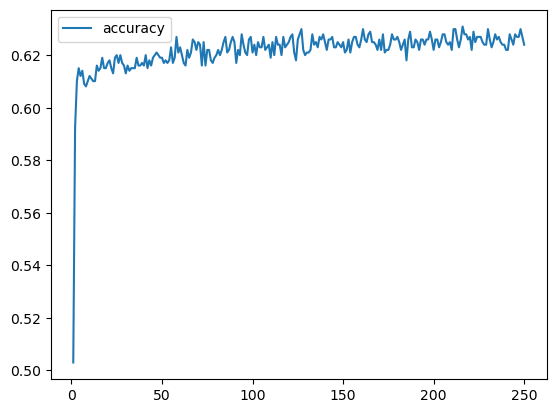

In [51]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1
history_df.plot(y="accuracy")

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - 13ms/step - accuracy: 0.6409 - loss: 0.6584
Loss: 0.6584097146987915, Accuracy: 0.640949547290802


### Hyperparameter tuning A work in progress!!!! <a>Hyper</a> 

In [53]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("X_train data type:", type(X_train))
print("X_test data type:", type(X_test))
print("y_train data type:", type(y_train))
print("y_test data type:", type(y_test))


X_train shape: (1008, 6)
X_test shape: (337, 6)
y_train shape: (1008,)
y_test shape: (337,)
X_train data type: <class 'pandas.core.frame.DataFrame'>
X_test data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>
y_test data type: <class 'pandas.core.series.Series'>


In [54]:
# Define a function to perform hyperparameter tuning
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        print(i)
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [55]:
tuner = kt.Hyperband(
    create_model,
    objective = "val_accuracy",
    max_epochs=100,
    hyperband_iterations=10
)

Reloading Tuner from .\untitled_project\tuner0.json


In [57]:
from kerastuner import HyperParameters

X_test_scaled = scaler.transform(X_test)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0].values

# Define a list of expected hyperparameters
expected_hyperparameters = ['activation', 'units', 'optimizer', 'learning_rate', ...]  # Add other expected hyperparameters

# Create a HyperParameters object and set its values
best_hyperparameters = HyperParameters()
for key, value in best_hyper.items():
    if key in expected_hyperparameters:
        setattr(best_hyperparameters, key, value)

# Create the best model using the retrieved hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Compile the best model with appropriate loss and optimizer
best_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Evaluate the best model against the test dataset
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


0
11/11 - 0s - 20ms/step - accuracy: 0.3947 - loss: 0.6931
Loss: 0.6931471824645996, Accuracy: 0.39465874433517456


In [58]:
# Define the model based on hyperparamter tuning results
nn_best = tf.keras.models.Sequential()

# Add the first hidden layer
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh', input_dim=number_input_features))

# Add additional hidden layers
nn_best.add(tf.keras.layers.Dense(units=1, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=11, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=1, activation='tanh'))

# Add the output layer
nn_best.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_best.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 11)                  │             187 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 634 (2.48 KB)

 Trainable params: 634 (2.48 KB)

 Non-trainable params: 0 (0.00 B)